In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from osgeo import gdal


In [ ]:
landsat = gdal.Open('/content/drive/MyDrive/final folder/cropped_verano.tif')
readArray = landsat.ReadAsArray()
readArray.shape
binMask = gdal.Open('/content/drive/MyDrive/final folder/binmask6real (1).tif')
readArray1 = binMask.ReadAsArray()
shape = readArray.shape
print(shape)
landsat.GetGeoTransform()
landsat.GetProjection()
p,q = readArray.shape
p
q

(902, 1744)


1744

(902, 1744)

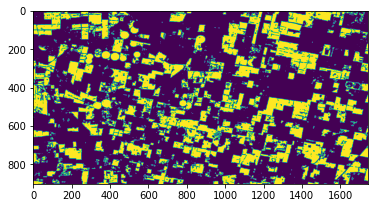

In [ ]:
change = np.where((readArray ==10),250,0)
plt.imshow(change)
change.shape

In [ ]:
drive = gdal.GetDriverByName('GTiff')
drive.Register()
new = drive.Create('new2.tiff',xsize = readArray.shape[1],ysize =readArray.shape[0],bands=1)
new.SetGeoTransform(binMask.GetGeoTransform())
new.SetProjection(binMask.GetProjection())
final = new.GetRasterBand(1)
final.WriteArray(change)
final.SetNoDataValue(np.nan)
final.FlushCache()
final = None
new =None


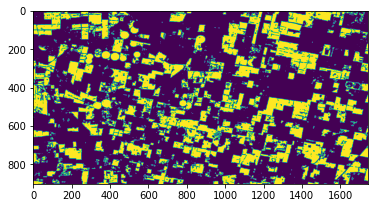

In [ ]:
new1 = gdal.Open('/content/new.tiff')
array = new1.ReadAsArray()
plt.imshow(array)

In [ ]:
x = pd.DataFrame()
reshape = np.reshape(readArray,[p*q,1],order ='F')
x['1stcolumn'] = pd.DataFrame(reshape)


In [ ]:
x['1stcolumn'].unique()

array([ 11,  10,  22, 255], dtype=uint8)

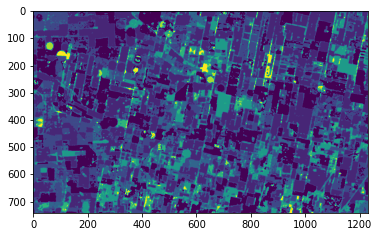

In [ ]:
all = gdal.Open('/content/drive/MyDrive/final folder/All_classes.tif')
array2 = all.ReadAsArray()
plt.imshow(array2)

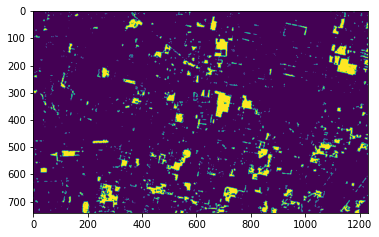

In [ ]:
plt.imshow(readArray1)